<a href="https://colab.research.google.com/github/khanArham0029/Digital-Image-Processing-A1/blob/main/Dip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image



In [1]:
from PIL import Image

# Open the image
image = Image.open("/content/q1.PNG")


# Get the image size
width, height = image.size

# Create a new image with transparency
new_image = Image.new("RGBA", (width, height), (0, 0, 0, 0))

# Copy the original image to the new image
new_image.paste(image, (0, 0))

# Set the transparency of the rectangle
rectangle = (width // 2 - 50, height // 2 - 50, width // 2 + 50, height // 2 + 50)
for x in range(rectangle[0], rectangle[2]):
    for y in range(rectangle[1], rectangle[3]):
        new_image.putpixel((x, y), (0, 0, 0, 0))

# Save the new image
new_image.save("new_image.png")


FileNotFoundError: [Errno 2] No such file or directory: '/content/q1.PNG'

In [ ]:
import numpy as np
from PIL import Image, ImageDraw

def find_darkest_rectangle(img):
    """
    Finds the smallest and darkest rectangle in the image.

    Args:
      img: A PIL Image object representing the input image.

    Returns:
      A tuple (left, top, right, bottom) representing the coordinates of the rectangle.
    """

    # Convert the image to grayscale
    grayscale_img = img.convert('L')

    # Convert the grayscale image to a NumPy array
    grayscale_array = np.array(grayscale_img)

    # Find the darkest pixel index
    darkest_pixel_index = np.argmin(grayscale_array)

    # Use the index to get coordinates
    darkest_pixel = np.unravel_index(darkest_pixel_index, grayscale_array.shape)

    # Initialize variables for rectangle detection
    left, top, right, bottom = darkest_pixel[1], darkest_pixel[0], darkest_pixel[1], darkest_pixel[0]
    min_intensity = grayscale_array[darkest_pixel]

    # Explore neighboring pixels to find the rectangle edges
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        x, y = darkest_pixel[1] + dx, darkest_pixel[0] + dy
        while 0 <= x < img.width and 0 <= y < img.height:
            if grayscale_array[y, x] <= min_intensity:
                min_intensity = grayscale_array[y, x]
                left = min(left, x)
                top = min(top, y)
                right = max(right, x + 1)
                bottom = max(bottom, y + 1)
            x, y = x + dx, y + dy

    return left, top, right, bottom

def set_transparency(img, rectangle):
    """
    Sets the transparency of the specified rectangle to zero.

    Args:
      img: A PIL Image object representing the input image.
      rectangle: A tuple (left, top, right, bottom) representing the rectangle coordinates.
    """

    # Create a transparency mask
    mask = Image.new('L', img.size, 255)
    mask_draw = ImageDraw.Draw(mask)
    mask_draw.rectangle(rectangle, fill=0)

    # Apply the mask to the alpha channel of the image
    img = img.convert("RGBA")
    img.putalpha(mask)

def main():
    # Load the image
    img = Image.open("/q1.PNG")

    # Find the smallest and darkest rectangle
    rectangle = find_darkest_rectangle(img)

    # Set the transparency of the rectangle
    set_transparency(img, rectangle)

    # Save the modified image
    img.save("output.png")

if __name__ == "__main__":
    main()


In [ ]:
from PIL import Image
import numpy as np

def ConvertToGray(img):
    """
    Converts a color image to grayscale.

    Args:
        img (numpy.ndarray): The input color image.

    Returns:
        numpy.ndarray: The converted grayscale image.
    """

    # Check if the input image is color
    if len(img.shape) == 3:
        # Convert the color image to grayscale using the formula
        imgGray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.11 * img[:, :, 2]
    else:
        # The input image is already grayscale
        imgGray = img

    return imgGray

# Load the color image using Pillow
img_color = np.array(Image.open("/content/q1.PNG"))

# Convert the color image to grayscale
img_gray = ConvertToGray(img_color)

# Convert to integer type
img_gray = img_gray.astype(np.uint8)

# Save the grayscale image
Image.fromarray(img_gray).save("/content/q1_gray.png")

# Display the grayscale image
Image.fromarray(img_gray).show()

# Display the color image
Image.fromarray(img_color).show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/q1.PNG'

In [ ]:
import numpy as np
from PIL import Image

def StackHorizontal(img_path1, img_path2, output_path):
    """Concatenates two images horizontally, reading them from files and saving the result.

    Args:
        img_path1 (str): Path to the first image file.
        img_path2 (str): Path to the second image file.
        output_path (str): Path to save the concatenated image.

    Raises:
        IOError: If either image file cannot be opened.
        ValueError: If the two images have different sizes or channel dimensions.
    """

    try:
        # Read images using PIL
        img1 = np.array(Image.open(img_path1))
        img2 = np.array(Image.open(img_path2))
    except IOError as e:
        raise IOError(f"Error opening image: {e}")

    # Validate input shapes and channels using np.equal
    if not np.equal(img1.shape[:2], img2.shape[:2]).all():
        raise ValueError("Images must have the same height and width.")
    if not np.equal(img1.shape[2:], img2.shape[2:]).all():
        raise ValueError("Images must have the same number of channels.")

    # Concatenate horizontally using efficient NumPy slicing
    combined_img = np.concatenate((img1, img2), axis=1)

    # Save the concatenated image using PIL
    Image.fromarray(combined_img).save(output_path)
    print(f"Images concatenated and saved to: {output_path}")
# Example usage:
img_path1 = "/content/q1.PNG"  # Replace with your image paths
img_path2 = "/content/q1.PNG"
output_path = "/content/q3_Con.png"

StackHorizontal(img_path1, img_path2, output_path)


Images concatenated and saved to: /content/q3_Con.png


Flipped image saved to: flipped_horizontal.jpg


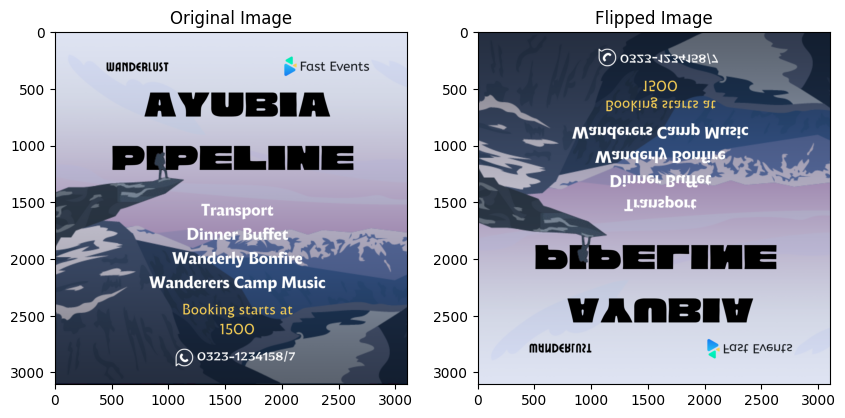

Flipped image saved to: flipped_vertical.png


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def FlipImg(img_path, flag=0, display=True, output_path=None):
    """Reads an image, flips it horizontally or vertically, optionally displays and saves it.

    Args:
        img_path (str): Path to the image file.
        flag (int, optional): The flipping direction flag.
            - 0 (default): Flip horizontally (left to right).
            - 1: Flip vertically (top to bottom).
        display (bool, optional): Whether to display the original and flipped images (default: True).
        output_path (str, optional): Path to save the flipped image (default: None).

    Returns:
        np.ndarray: The flipped image.

    Raises:
        IOError: If the image file cannot be opened or saved.
        ValueError: If the flag is invalid or output path is missing when saving.
    """

    # Validate input shapes, flip flag, and output path
    if not isinstance(flag, int) or flag not in (0, 1):
        raise ValueError("Invalid flag value. Choose 0 for horizontal flip or 1 for vertical flip.")
    if output_path and not isinstance(output_path, str):
        raise ValueError("Output path must be a string.")

    try:
        # Read image using PIL
        img = np.array(Image.open(img_path))
    except IOError as e:
        raise IOError(f"Error opening image: {e}")

    # Perform image flipping
    if flag == 0:
        flipped_img = img[:, ::-1, ...]  # Reverse columns for horizontal flip
    else:
        flipped_img = img[::-1, ...]  # Reverse rows for vertical flip

    # Optional display with matplotlib
    if display:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(img)
        ax1.set_title("Original Image")
        ax2.imshow(flipped_img)
        ax2.set_title("Flipped Image")
        plt.show()

    # Save flipped image
    if output_path:
        try:
            Image.fromarray(flipped_img).save("/content/q3_Con.png")
            print(f"Flipped image saved to: {output_path}")
        except IOError as e:
            raise IOError(f"Error saving flipped image: {e}")

    return flipped_img

# Example usage:
img_path = "/Ayubiya.png"  # Replace with your image path
flipped_img_horizontal = FlipImg(img_path, 0, display=False, output_path="flipped_horizontal.jpg")  # Flip horizontally and save
flipped_img_vertical = FlipImg(img_path, 1, output_path="flipped_vertical.png")  # Flip vertically and save

# Use flipped_img_horizontal and flipped_img_vertical as needed!


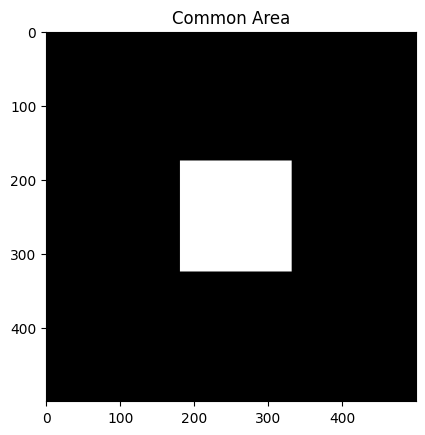

In [ ]:
import numpy as np
from PIL import Image


def CommonImg(img_path1, img_path2, display=True):
    """Reads two grayscale images, finds the common area, and optionally displays the result.

    Args:
        img_path1 (str): Path to the first grayscale image file.
        img_path2 (str): Path to the second grayscale image file.
        display (bool, optional): Whether to display the common area (default: True).

    Returns:
        None

    Raises:
        IOError: If either image file cannot be opened.
        ValueError: If images are not grayscale or have different dimensions.
    """

    try:
        # Read images using PIL and ensure grayscale format
        img1 = np.array(Image.open(img_path1).convert('L'))  # Convert to grayscale
        img2 = np.array(Image.open(img_path2).convert('L'))

    except IOError as e:
        raise IOError(f"Error opening image: {e}")

    # Validate input shapes and grayscale format
    if not (img1.shape == img2.shape and len(img1.shape) == 2):
        raise ValueError("Images must be grayscale and have the same dimensions.")

    # Find common area using logical AND operation
    common_area = (img1 != 0) & (img2 != 0)

    # Handle no common area case
    if not np.any(common_area):
        print("No common area found.")
        if display:
            # Display a black image using matplotlib
            import matplotlib.pyplot as plt
            plt.imshow(np.zeros_like(img1), cmap="gray")
            plt.title("No Common Area")
            plt.show()
    else:
        if display:
            # Display the common area using matplotlib
            import matplotlib.pyplot as plt
            plt.imshow(common_area, cmap="gray")
            plt.title("Common Area")
            plt.show()


# Example usage:
img_path1 = "/1.png"  # Replace with your grayscale image paths
img_path2 = "/2.png"

CommonImg(img_path1, img_path2)  # Display common area
CommonImg(img_path1, img_path2, display=False)  # Check for common area without displaying

# Note: Ensure images are grayscale and have the same dimensions before running!
